In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code'

/content/drive/My Drive/Studies 2/Year 2/Final Project/project_git_repo/code


In [3]:
!pip install scanpy
!pip install stlearn 
!pip install matplotlib==3.4.3


     |████████████████████████████████| 2.0 MB 30.6 MB/s 
     |████████████████████████████████| 88 kB 8.3 MB/s 
     |████████████████████████████████| 96 kB 6.9 MB/s 
     |████████████████████████████████| 11.2 MB 62.6 MB/s 
     |████████████████████████████████| 930 kB 53.1 MB/s 
     |████████████████████████████████| 1.1 MB 54.6 MB/s 
     |████████████████████████████████| 63 kB 3.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=205907d42e797761fa1ebb814529b7f27f61bc9b0e04bd660db055ccfb67bd4f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=a276beeb50e8f30f13c40aa70f3814394f4ac4893d229a35ef51cec7b5f15187
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
  Created wheel for session-info: filename=session_info-1.0.0-py3-n

     |████████████████████████████████| 415 kB 35.1 MB/s 
     |████████████████████████████████| 13.5 MB 58.4 MB/s 
     |████████████████████████████████| 96 kB 8.5 MB/s 
     |████████████████████████████████| 1.1 MB 66.2 MB/s 
     |████████████████████████████████| 18.5 MB 189 kB/s 
     |████████████████████████████████| 1.3 MB 57.5 MB/s 
     |████████████████████████████████| 4.3 MB 60.4 MB/s 
     |████████████████████████████████| 3.1 MB 45.1 MB/s 
     |████████████████████████████████| 462 kB 72.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.18.3
    Uninstalling scikit-image-0.18.3:
      Successfully uninstalled scikit-image-0.18.3
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2


     |████████████████████████████████| 10.3 MB 25.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [7]:
%load_ext autoreload
%autoreload 2
from load_data import Data
from train import engine
import stlearn as st

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

# Load Visium Data with stlearn

In [9]:
dataset_name = 'data/V1_Human_Lymph_Node'

In [12]:
data = st.Read10X(dataset_name)
data

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


OSError: ignored

In [ ]:
X = data.X.toarray()

In [ ]:
import seaborn as sns
bin_count, bin_val = np.histogram(X, bins=25)
plt.figure(figsize=(12, 6))
plt.title('gene reads histogram')
plt.ylabel('count')
plt.xlabel('# reads')
sns.barplot(x=bin_val[:-1].astype(int), y=bin_count)
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
bin_count, bin_val = np.histogram(X[X < 100], bins=25)
plt.figure(figsize=(12, 6))
plt.title('gene reads histogram - lower range (< 100 counts)')
plt.ylabel('count')
plt.xlabel('# reads')
sns.barplot(x=bin_val[:-1].astype(int), y=bin_count)
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
bin_count, bin_val = np.histogram(X[(X < 100) & (X > 0)], bins=25)

# The final bin will include the entire range, adding it
bin_count = np.hstack([bin_count, np.zeros(2)])
bin_val = np.hstack([bin_val, np.ones(1) * np.inf])

X_flat = X.flatten()
all_indices = np.arange(X_flat.shape[0])
nonzero_indices = np.where(X_flat)[0]

In [ ]:
DESIRED_DROPOFF_RATIO = 0.1

dropped_indices = np.random.choice(nonzero_indices, 
                                   size=int(nonzero_indices.shape[0] * DESIRED_DROPOFF_RATIO),
                                   replace=False)
#                                    p=dropoff_flat[nonzero_indices] / dropoff_flat[nonzero_indices].sum())
print(f'dropped nonzero indices: {dropped_indices.shape[0]}')
print(f'drop ratio (nonzero): {dropped_indices.shape[0] / nonzero_indices.shape[0]:.2f}')
print(f'drop ratio (original): {dropped_indices.shape[0] / X_flat.shape[0]:.2f}')


X_dropped = X.copy()
X_dropped[np.unravel_index(dropped_indices, X.shape)] = 0
X_dropped

print(f'Non zero values - original n {(X > 0).sum()}, post-drop n {(X_dropped > 0).sum()}')

dropped nonzero indices: 2371710
drop ratio (nonzero): 0.10
drop ratio (original): 0.02
Non zero values - original n 23717106, post-drop n 21345396


In [ ]:
col_idx = np.tile(np.arange(X.shape[1]), (X.shape[0]))
row_idx = np.repeat(np.arange(X.shape[0]), (X.shape[1]))
vals = X.flatten()


# print(col_idx.shape, row_idx.shape, vals.shape)
pair_array = np.vstack((col_idx, row_idx, vals)).T


test_idx = 100848733
print(col_idx[test_idx])
print(row_idx[test_idx])
print(pair_array[test_idx])
print(X[row_idx[test_idx], col_idx[test_idx]])

12978
2755
[12978.  2755.     0.]
0.0


In [ ]:
from sklearn.model_selection import train_test_split
# Train-test splitting the pair array based on dropped indices
train_indices = all_indices[~np.isin(all_indices, dropped_indices)]
validation_indices, test_indices = train_test_split(dropped_indices, train_size=0.1)

# train_indices, validation_indices = train_test_split(train_indices, train_size=0.9)
# print(train_indices.shape, validation_indices.shape, test_indices.shape)

assert train_indices.shape[0] + validation_indices.shape[0] + test_indices.shape[0] == X_flat.shape[0]

In [ ]:
import torch
from torch.utils.data import TensorDataset
import os
BATCH_SIZE = 8192
NUM_WORKERS = 6
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
train_array = pair_array[train_indices]
train_dataloader = torch.utils.data.DataLoader(TensorDataset(torch.Tensor(train_array[train_array[:, 2] > 0]).to(dtype=torch.int)), num_workers=NUM_WORKERS, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(TensorDataset(torch.Tensor(pair_array[validation_indices]).to(dtype=torch.int)), num_workers=NUM_WORKERS, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
# test_dataloader = torch.utils.data.DataLoader(TensorDataset(pair_array[test_indices]), pin_memory=True,
#                                                num_workers=0, batch_size=BATCH_SIZE)

In [ ]:
# dataset = Data(dataset=dataset_name, device = 'cpu')
# dataset.set_dataloaders()

In [ ]:
number_of_genes = data.n_vars
number_of_spots = data.n_obs

In [ ]:
import seaborn as sns
bin_count, bin_val = np.histogram(dataset.stlearn_anndata.X, bins=25)
plt.figure(figsize=(12, 6))
plt.title('gene reads histogram')
plt.ylabel('count')
plt.xlabel('# reads')
sns.barplot(x=bin_val[:-1].astype(int), y=bin_count)
plt.yscale('log')
plt.xticks(rotation = 45)
plt.show()

# NMF

In [ ]:
from models import NMF

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "RMSprop",
    'latent_dim': 20,
    'batch_size': 512
}

In [ ]:
nmf_model = NMF(number_of_genes, number_of_spots, params, 'cuda')

In [ ]:
train_nmf = engine(model = nmf_model,
                    model_name = 'NMF',
                    params = params,
                    epochs = 100,
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_test,
                    device = 'cuda')

NMF(
  (embedding_genes): Embedding(653, 20)
  (embedding_spots): Embedding(4035, 20)
)


In [ ]:
nmf_train_losses, nmf_test_losses = train_nmf.execute()

Epoch #0 Train Loss: 2955.007644725615
Epoch #0 Test Loss: 2871.9253718120026
Epoch #10 Train Loss: 1744.0512792049838
Epoch #10 Test Loss: 1650.1905115678235
Epoch #20 Train Loss: 1397.0686863466315
Epoch #20 Test Loss: 1334.1755607727898
Epoch #30 Train Loss: 1169.5761294853432
Epoch #30 Test Loss: 1119.7511831573293
Epoch #40 Train Loss: 999.5721772202241
Epoch #40 Test Loss: 957.207641769847
Epoch #50 Train Loss: 868.6812050601727
Epoch #50 Test Loss: 831.5113920408269
Epoch #60 Train Loss: 766.9686064039778
Epoch #60 Test Loss: 734.116135519693
Epoch #70 Train Loss: 687.1436763339406
Epoch #70 Test Loss: 658.3800631702863
Epoch #80 Train Loss: 623.4546127483719
Epoch #80 Test Loss: 598.8218818683741
Epoch #90 Train Loss: 571.7471686543706
Epoch #90 Test Loss: 551.3263731922843


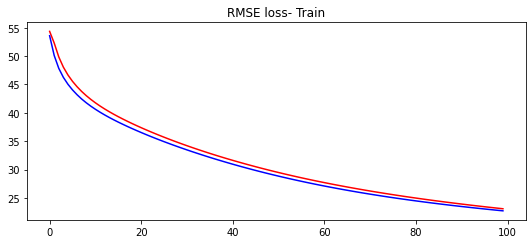

In [ ]:
plt.title("RMSE loss")
plt.plot(np.sqrt(nmf_train_losses), color="red")
plt.plot(np.sqrt(nmf_test_losses), color="blue")

# PMF (Reguralized MF)

In [ ]:
from models import PMF

In [ ]:
pmf_model = PMF(number_of_genes, number_of_spots, params, 'cuda', lam_u=0.05, lam_v=0.05)

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "Adam",
    'latent_dim': 20,
    'batch_size': 512
}

In [ ]:
train_pmf = engine(model = pmf_model,
                   model_name = 'PMF',
                    params = params,
                    epochs = 100,
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_test,
                   device = 'cuda')

PMF(
  (embedding_genes): Embedding(653, 20)
  (embedding_spots): Embedding(4035, 20)
)


In [ ]:
pmf_train_losses, pmf_test_losses = train_pmf.execute()

Epoch #0 Train Loss: 47986279.9059164
Epoch #0 Test Loss: 47781850.372510925
Epoch #10 Train Loss: 47910845.75894697
Epoch #10 Test Loss: 47783145.9981401
Epoch #20 Train Loss: 47907182.50873865
Epoch #20 Test Loss: 47783092.71909329
Epoch #30 Train Loss: 47905815.00090807
Epoch #30 Test Loss: 47782419.51448401


KeyboardInterrupt: ignored

In [ ]:
plt.title("RMSE loss- Train")
plt.plot(np.sqrt(pmf_train_losses), color="red")
plt.plot(np.sqrt(pmf_test_losses), color="blue")

# NN- MF

In [ ]:
%load_ext autoreload
%autoreload 2
from models import NNMF
from torch import nn

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1 Linear Layer

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "Adam",
    'latent_dim': 256,
    'batch_size': 512,
    'layers_sizes': [(256,10)]
}

In [ ]:
nnmf_model = NNMF(number_of_genes, number_of_spots, params, 'cpu')

In [ ]:
train_nnmf = engine(model = nnmf_model,
                    model_name = 'NNMF',
                    params = params,
                    epochs = 100,
                    dl_train = train_dataloader,
                    dl_test = val_dataloader,
                    device = 'cpu')

NNMF(
  (embedding_genes): Embedding(36602, 256)
  (embedding_spots): Embedding(4036, 256)
  (linear_layers): ModuleList(
    (0): Linear(in_features=256, out_features=10, bias=True)
  )
  (out_layer): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
nnmf_utrain_losses, nnmf_test_losses = train_nnmf.execute()

Train epoch 0/100:   0%|                                                                      | 0/2606 [00:05<?, ?it/s]


RuntimeError: DataLoader worker (pid(s) 4944, 19532) exited unexpectedly

## 3 Linear Layers

In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "Adam",
    'latent_dim': 20,
    'batch_size': 512,
    'layers_sizes': [(40,100), (100,50), (50,10)]
}

In [ ]:
nnmf_model = NNMF(number_of_genes, number_of_spots, params, 'cuda')

In [ ]:
train_nnmf = engine(model = nnmf_model,
                   model_name = 'NNMF',
                    params = params,
                    epochs = 100,
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_test,
                    device = 'cpu')

In [ ]:
nnmf_train_losses, nnmf_test_losses = train_nnmf.execute()

# NeuMF

In [ ]:
%load_ext autoreload
%autoreload 2
from models import NeuMF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
params = {
    'learning_rate': 0.001,
    'optimizer': "Adam",
    'latent_dim': 20,
    'batch_size': 512,
    'layers_sizes': [40, 10]
}

In [ ]:
neumf_model = NeuMF(number_of_genes, number_of_spots, params, 'cpu')

In [ ]:
train_neumf = engine(model = neumf_model,
                    model_name = 'NeuMF',
                    params = params,
                    epochs = 5,
                    dl_train = dataset.dl_train,
                    dl_test = dataset.dl_test,
                    device = 'cpu')

NeuMF(
  (embedding_user_mlp): Embedding(653, 20)
  (embedding_item_mlp): Embedding(4035, 20)
  (embedding_user_mf): Embedding(653, 20)
  (embedding_item_mf): Embedding(4035, 20)
  (fc_layers): ModuleList(
    (0): Linear(in_features=40, out_features=10, bias=True)
    (1): ReLU()
  )
  (affine_output): Linear(in_features=30, out_features=1, bias=True)
  (logistic): Sigmoid()
)


In [ ]:
neumf_train_losses, neumf_test_losses = train_neumf.execute()

Epoch #0 Train Loss: 2905.436583908024
Epoch #0 Test Loss: 3439.478320380679
Epoch #1 Train Loss: 2905.3688336107334
Epoch #1 Test Loss: 3439.4149342148326
Epoch #2 Train Loss: 2905.3476176997624
Epoch #2 Test Loss: 3439.466623946998
Epoch #3 Train Loss: 2905.3370755087976
Epoch #3 Test Loss: 3439.449971101306



KeyboardInterrupt



In [ ]:
plt.title("RMSE loss- Train")
plt.plot(np.sqrt(neumf_train_losses), color="red")
plt.plot(np.sqrt(neumf_test_losses), color="blue")